# WeatherPy
----

### Analysis
* Like the starter code points out, the temperature goes down as the Latitude moves away from 0 degrees.The coldest is showing up between 60-80 degrees, which is around Russia. 
* There is a decently consistent representation of humidity across the board in the Lat vs. Humidity plot. 
* The windspeed increases as we get further away from the equator, specifically between 70-80 degrees. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Dependencies and Setup

In [1]:
# Imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import seaborn as sns
from api_keys import api_key
from citipy import citipy

## Generate Cities List

In [2]:
# Declare variables describing the scope of lat/long for cities. 
# Set the latitude ranges from -90 to 90,  longitude ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Next, make arrays with increments of lat/long.
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [3]:
# Prep a DataFrame so you can use it to view the city/weather data
colnames = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temperature (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
city_df = pd.DataFrame(columns = colnames)
city_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


### Perform API Calls
* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.


In [4]:
# Set the sample size to 500 so the code will select 500 items from Open Weather Map's API
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(city_df) < sample_size:
    # Tell the code to select random Lat/Long points
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Hey citipy, we need the nearest_city() method so we can use the city object. Thanks!
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code

# Ring, Ring - calling Open Weather Map API to obtain data and append it to a DataFrame...
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    ringring_response = requests.get(url)
    ringring_json = ringring_response.json()
    if ringring_json["cod"] == 200:
        print('City: %s. %s' % (ringring_json['name'], url))
        latitude = ringring_json["coord"]["lat"]
        longitude = ringring_json["coord"]["lon"]
        temperature = ringring_json["main"]["temp"]
        humidity = ringring_json["main"]["humidity"]
        cloudiness = ringring_json["clouds"]["all"]
        windspeed = ringring_json["wind"]["speed"]
        
# Say no to repeats
        if city_name not in city_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(ringring_json["cod"]), len(city_df)+1))

# Now, use the DataFrame you made earlier to make a nice output of the 500
            city_df.set_value(record, "city_name", city_name)
            city_df.set_value(record, "country_code", country_code)
            city_df.set_value(record, "rand_lat", rand_lat)
            city_df.set_value(record, "rand_lng", rand_lng)
            city_df.set_value(record, "Latitude", latitude)
            city_df.set_value(record, "Longitude", longitude)
            city_df.set_value(record, "Temperature (F)", temperature)
            city_df.set_value(record, "Humidity (%)", humidity)
            city_df.set_value(record, "Cloudiness (%)", cloudiness)
            city_df.set_value(record, "Wind Speed (mph)", windspeed)

            record += 1
        
# Tell the code to wait 1-4 seconds before it starts the next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

City: Thompson. http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 1


C:\Users\janac\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\janac\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\janac\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\janac\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\janac\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\janac\Anaconda3\lib\s

City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 2
City: East London. http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 3
City: Nizwa. http://api.openweathermap.org/data/2.5/weather?q=nizwa,om&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 4
City: Mahebourg. http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 5
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 6
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF

City: Isangel. http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 40
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 41
City: Provideniya. http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 42
City: Provideniya. http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Bulgan. http://api.openweathermap.org/data/2.5/weather?q=bulgan,mn&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 43
City: Phuket. http://api.openweathermap.org/data/2

City: Gushikawa. http://api.openweathermap.org/data/2.5/weather?q=gushikawa,jp&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 75
City: Moerai. http://api.openweathermap.org/data/2.5/weather?q=moerai,pf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 76
City: Luanda. http://api.openweathermap.org/data/2.5/weather?q=luanda,ao&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 77
City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Waipawa. http://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Georgetown. http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial

City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Klaksvik. http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 110
City: Lompoc. http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 111
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Wang Saphung. http://api.openweathermap.org/data/2.5/weather?q=wang saphung,th&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639

City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Colquechaca. http://api.openweathermap.org/data/2.5/weather?q=colquechaca,bo&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 139
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Wangqing. http://api.openweathermap.org/data/2.5/weather?q=wangqing,cn&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 140
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb9

City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Tuatapere. http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 169
City: Dzaoudzi. http://api.openweathermap.org/data/2.5/weather?q=dzaoudzi,yt&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 170
City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Maine-Soroa. http://api.openweathermap.org/data/2.5/weather?q=maine-soroa,ne&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 171
City: Paamiut. http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 172
City: Honiara. http://api.openweathermap.org/data/

City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Kahului. http://api.openweathermap.org/data/2.5/weather?q=kahului,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 194
City: Kamaishi. http://api.openweathermap.org/data/2.5/weather?q=kamaishi,jp&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 195
City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Zeya. http://api.openweathermap.org/data/2.5/weather?q=zeya,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 196
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&uni

City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&

City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Champerico. http://api.openweathermap.org/data/2.5/weather?q=champerico,gt&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 234
City: Tyukhtet. http://api.openweathermap.org/data/2.5/weather?q=tyukhtet,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 235
City: Coihaique. http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 236
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowkn

City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Qiongshan. http://api.openweathermap.org/data/2.5/weather?q=qiongshan,cn&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 252
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Thompson. http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Arraial do Cabo. http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Berea. http://api.openweathermap.org/data/2.5/weather?q=berea,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 253
City: Pangkalanbuun. http://api.openweathermap.org/data/2.5/weather?q=pangkalanbuun,id&units=imperial&APPID=34f2b3b66df46a9f2da9cc

City: Boa Vista. http://api.openweathermap.org/data/2.5/weather?q=boa vista,br&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 271
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Sao Joao da Barra. http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra,br&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Bossangoa. http://api.openw

City: Fredericton. http://api.openweathermap.org/data/2.5/weather?q=fredericton,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 289
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ribeira Grande. http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Aklavik. http://api.openweathermap.org/data/2.5/weather?q=aklavik,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 290
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&AP

City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Waimana. http://api.openweathermap.org/data/2.5/weather?q=waimana,nz&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 308
City: Kupino. http://api.openweathermap.org/data/2.5/weather?q=kupino,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 309
City: Touros. http://api.openweathermap.org/data/2.5/weather?q=touros,br&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Lebu. htt

City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Oranjemund. http://api.openweathermap.org/data/2.5/weather?q=oranjemund,na&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 330
City: Esperance. http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Hirara. http://api.openweathermap.org/data/2.5/weather?q=hirara,jp&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 331
City: Rawson. http://api.openweathermap.org/data/2.5/weather?q=rawson,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 332
City: Bambous Virieux. http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 333
City: Faanui. http://api.openweathermap.org/data

City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Bambous Virieux. http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ribeira Grande. http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Pauini. http://api.openweathermap.org/data/2.5/weather?q=pauini,br&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 354
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: S

City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Tevriz. http://api.openweathermap.org/data/2.5/weather?q=tevriz,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 371
City: Flin Flon. http://api.openweathermap.org/data/2.5/weather?q=flin flon,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 372
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Srandakan. http://api.openweathermap.org/data/2.5/weather?q=srandakan,id&units=imperial&APPID=34f2b3b66df46a

City: Nitchidorf. http://api.openweathermap.org/data/2.5/weather?q=nitchidorf,ro&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 390
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Lukulu. http://api.openweathermap.org/data/2.5/weather?q=lukulu,zm&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 391
City: Vanimo. http://api.openweathermap.org/data/2.5/weather?q=vanimo,pg&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 392
City: Isparta. http://api.openweathermap.org/data/2.5/weather?q=isparta,tr&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 393
City: Jumla. http://api.openweathermap.org/data/2.5/weather?q=jumla,np&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Victoria. http://api.openweathermap.org/data/2.5/weath

City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Monaragala. http://api.openweathermap.org/data/2.5/weather?q=monaragala,lk&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 414
City: Zemio. http://api.openweathermap.org/data/2.5/weather?q=zemio,cf&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 415
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Tuatapere. http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Cherskiy. http://api.openweathermap.org/data/2.5/weather?q=cherskiy,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Anc

City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Katsuura. http://api.openweathermap.org/data/2.5/weather?q=katsuura,jp&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Verkhnyaya Inta. http://api.openweathermap.org/data/2.5/weather?q=verkhnyaya inta,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 434
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Gamba. http://api.openweathermap.org/data/2.5/weather?q=gamba,ga&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length

City: Tazovskiy. http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Agdam. http://api.openweathermap.org/data/2.5/weather?q=agdam,az&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 458
City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Palmer. http://api.openweathermap.org/data/2.5/weather?q=palmer,us&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 459
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Lorengau. http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Tiksi. http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Port Alfred. ht

City: Taoudenni. http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 483
City: Peniche. http://api.openweathermap.org/data/2.5/weather?q=peniche,pt&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 484
City: Iqaluit. http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Caravelas. http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Rosignol. http://api.openweathermap.org/data/2.5/weather?q=rosignol,gy&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
Status code: 200. DF length is now: 485
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=34f2b3b66df46a9f2da9cc8fb99c6639
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Time to look at the DataFrame, yay!
city_df.head()

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,thompson,ca,61.47,-99.63,55.74,-97.86,6.8,65,90,18.34
1,yellowknife,ca,74.52,-111.9,62.45,-114.38,12.2,39,40,5.82
2,east london,za,-62.32,50.11,-33.02,27.91,74.83,100,0,16.37
3,nizwa,om,21.95,56.85,22.93,57.53,45.71,39,0,0.6
4,mahebourg,mu,-39.33,71.72,-20.41,57.7,80.24,78,40,8.05


In [6]:
# Yay! It worked! Now, let's write the info into a new CSV
city_df.to_csv("cities.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

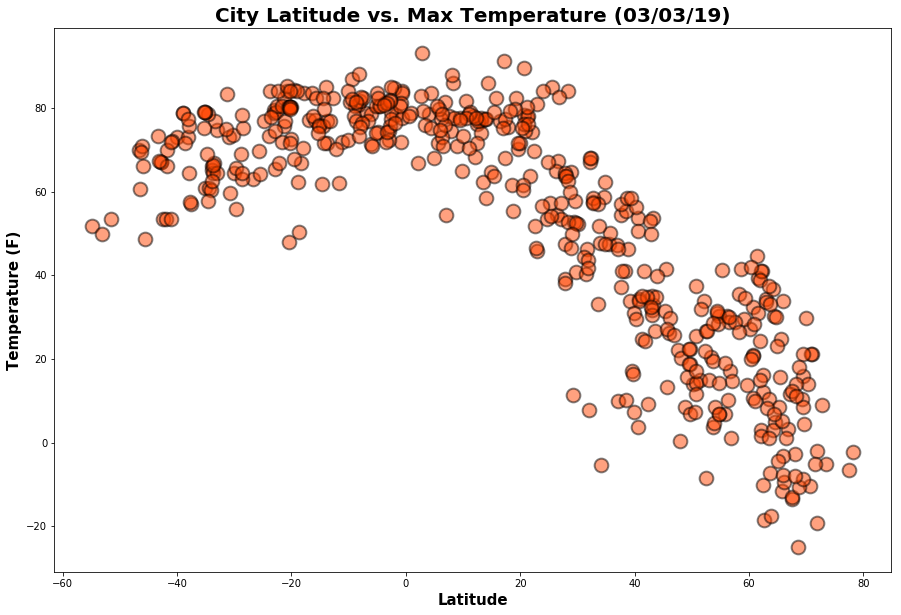

In [7]:
plt.figure(figsize = (15,10))
plt.scatter(city_df["Latitude"],city_df["Temperature (F)"], alpha = 0.5, 
                                                        color = "orangered", 
                                                        edgecolors="black", 
                                                        label = "Lat vs. Temp",
                                                        s = 188,
                                                        linewidth = 2)
plt.title("City Latitude vs. Max Temperature (03/03/19)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Temperature (F)", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

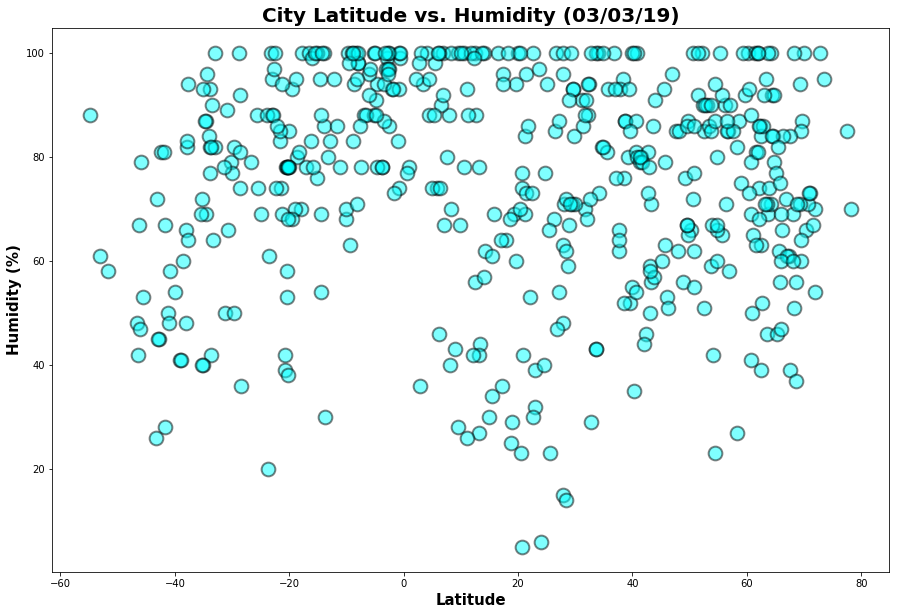

In [8]:
plt.figure(figsize = (15,10))
plt.scatter(city_df["Latitude"],city_df["Humidity (%)"], alpha = 0.5, 
                                                        color = "aqua", 
                                                        edgecolors="black", 
                                                        label = "Lat vs. Humidity",
                                                        s = 188,
                                                        linewidth = 2)
plt.title("City Latitude vs. Humidity (03/03/19)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Humidity (%)", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

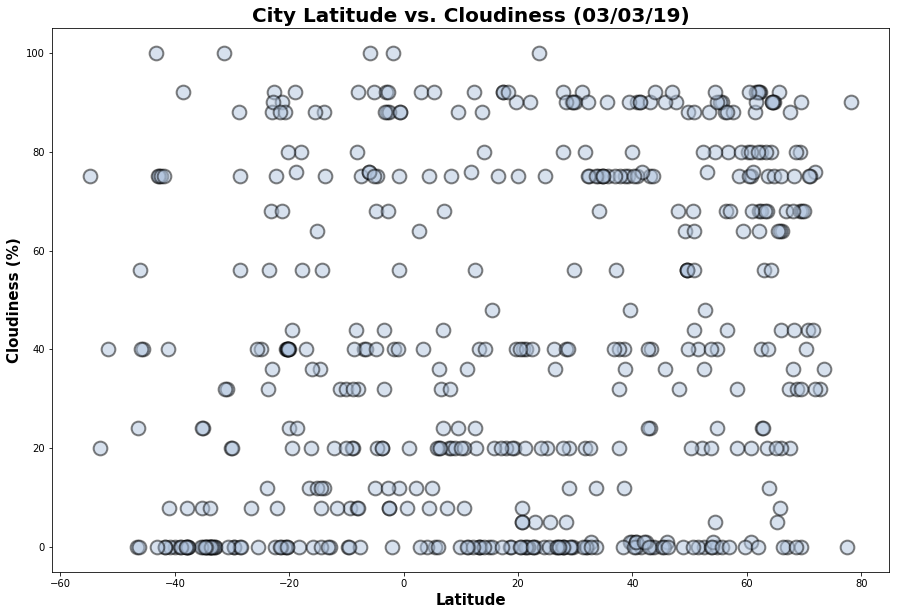

In [9]:
plt.figure(figsize = (15,10))
plt.scatter(city_df["Latitude"],city_df["Cloudiness (%)"], alpha = 0.5, 
                                                        color = "lightsteelblue", 
                                                        edgecolors="black", 
                                                        label = "Lat vs. Cloudiness",
                                                        s = 188,
                                                        linewidth = 2)
plt.title("City Latitude vs. Cloudiness (03/03/19)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Cloudiness (%)", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

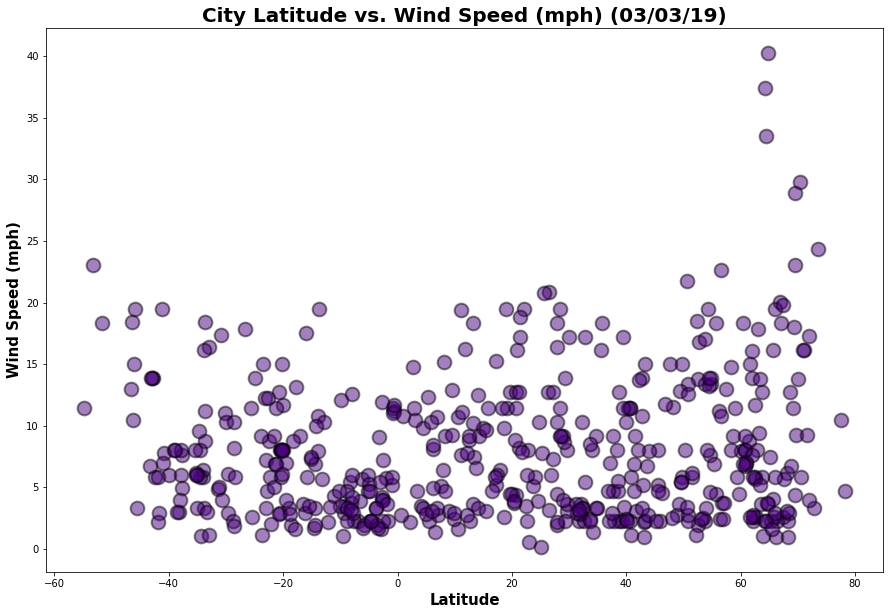

In [10]:
plt.figure(figsize = (15,10))
plt.scatter(city_df["Latitude"],city_df["Wind Speed (mph)"], alpha = 0.5, 
                                                        color = "indigo", 
                                                        edgecolors="black", 
                                                        label = "Lat vs. Wind Speed",
                                                        s = 188,
                                                        linewidth = 2)
plt.title("City Latitude vs. Wind Speed (mph) (03/03/19)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Wind Speed (mph)", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.savefig("WindSpeed.png")
plt.show()

#### Latitude vs. Longitude

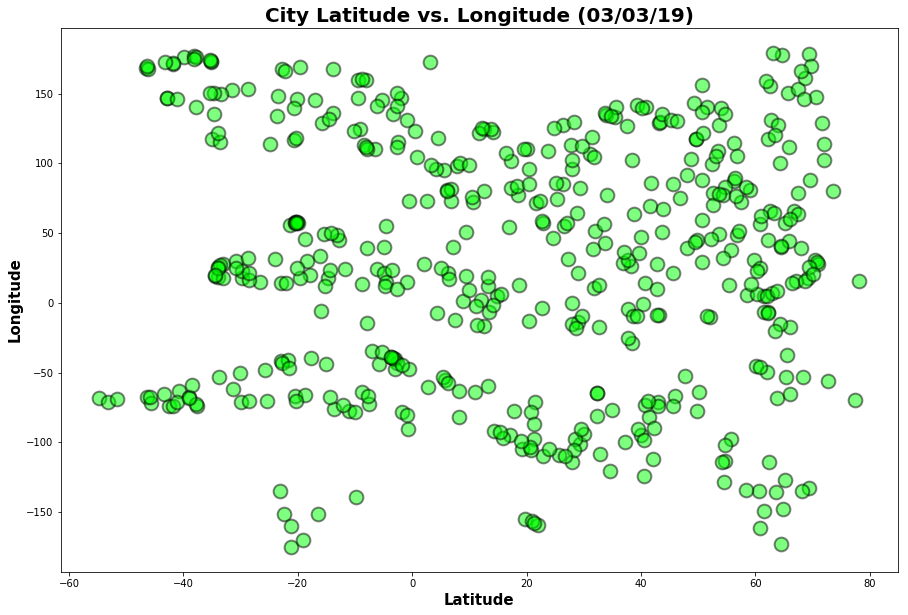

In [11]:
plt.figure(figsize = (15,10))
plt.scatter(city_df["Latitude"],city_df["Longitude"], alpha = 0.5, 
                                                        color = "lime", 
                                                        edgecolors="black", 
                                                        label = "Lat vs. Long",
                                                        s = 188,
                                                        linewidth = 2)
plt.title("City Latitude vs. Longitude (03/03/19)", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Latitude", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Longitude", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.savefig("LatLong.png")
plt.show()